In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
def get_div(snapshot):
    div = np.zeros_like(snapshot)
    n, m = snapshot.shape
    K = discrete_K(n, m)
    for i in range(1, n-1):
        for j in range(1, m - 1):
            vxx = (K[i+1,j]*(snapshot[i+1,j]-snapshot[i,j]) - K[i,j]*(snapshot[i,j]-snapshot[i-1,j]) )/(1/n * 1/n)
            vzz = (K[i,j+1]*(snapshot[i,j+1]-snapshot[i,j]) - K[i,j]*(snapshot[i,j]-snapshot[i,j-1]) )/(1/m * 1/m)
            div[i, j] = vzz + vxx
    return div

MovieWriter ffmpeg unavailable; using Pillow instead.


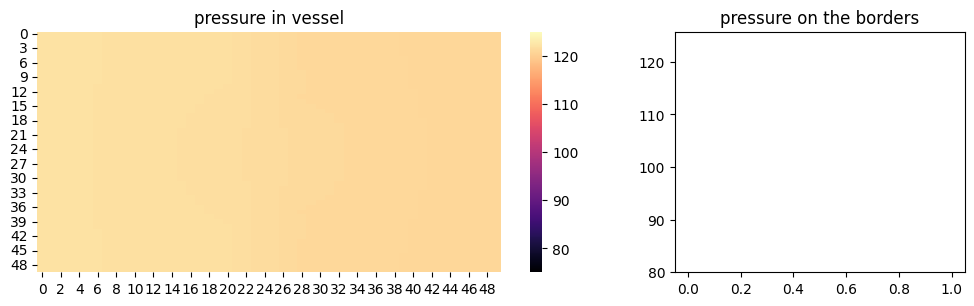

In [14]:
period = 10

no_frames = T//period
times = np.linspace(0, 1, T)

from matplotlib import animation


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 3), gridspec_kw=dict(width_ratios=[2, 1]))
fig.tight_layout()


axs[0].set_title("pressure in vessel")
axs[1].set_title("pressure on the borders")

sns.heatmap(ns_grid.p[0].T, ax=axs[0], vmax=125, vmin=75, cmap='magma')

temperature_line, = axs[1].plot([], [], c="saddlebrown")
axs[1].plot(times, cardiac_cycle_interp, "w", lw=0.3)

def animate(i):
    sns.heatmap(ns_grid.p[i * period].T, ax=axs[0], vmax=125, vmin=75, cbar=False, cmap='magma')
    temperature_line.set_data(times[:i * period], cardiac_cycle_interp[:i * period])




ani = animation.FuncAnimation(
    fig, animate, no_frames, interval=50, repeat=False)

ani.save(f"pressure_sharp_K.gif")

In [16]:
def magnitude_of_gradient(field):
    n, m = field.shape
    dx, dy = np.gradient(field)
    dx /= (2 * (1/n))
    dy /= (2 * (1/m))
    return np.sqrt(dx*dx + dy*dy)

MovieWriter ffmpeg unavailable; using Pillow instead.


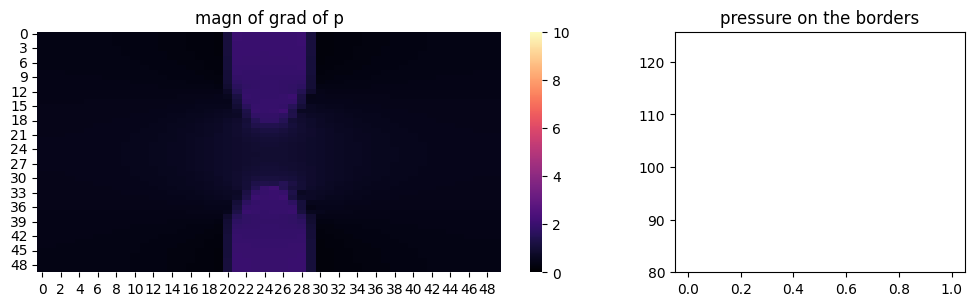

In [17]:
period = 10

no_frames = T//period
times = np.linspace(0, 1, T)

from matplotlib import animation


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 3), gridspec_kw=dict(width_ratios=[2, 1]))
fig.tight_layout()


axs[0].set_title("magn of grad of p")
axs[1].set_title("pressure on the borders")

sns.heatmap(magnitude_of_gradient(ns_grid.p[0].T), ax=axs[0], vmax=10, vmin=0, cmap='magma')

temperature_line, = axs[1].plot([], [], c="saddlebrown")
axs[1].plot(times, cardiac_cycle_interp, "w", lw=0.3)

def animate(i):
    sns.heatmap(magnitude_of_gradient(ns_grid.p[i * period].T), ax=axs[0], vmax=10, vmin=0, cbar=False, cmap='magma')
    temperature_line.set_data(times[:i * period], cardiac_cycle_interp[:i * period])




ani = animation.FuncAnimation(
    fig, animate, no_frames, interval=50, repeat=False)

ani.save(f"magn_grad_sharp_K.gif")